<a href="https://colab.research.google.com/github/hengqujushi/gcn_colab/blob/main/gcn_cora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!git clone https://github.com/hengqujushi/gcn_colab

Cloning into 'gcn_colab'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 40 (delta 6), reused 40 (delta 6), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [29]:
!python ./gcn_colab/setup.py install

running install
running bdist_egg
running egg_info
writing gcn.egg-info/PKG-INFO
writing dependency_links to gcn.egg-info/dependency_links.txt
writing requirements to gcn.egg-info/requires.txt
writing top-level names to gcn.egg-info/top_level.txt
reading manifest file 'gcn.egg-info/SOURCES.txt'
writing manifest file 'gcn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying gcn.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying gcn.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying gcn.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying gcn.egg-info/requires.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying gcn.egg-info/top_level.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
zip_safe flag not set; analyzing archive contents...
creating 'dist/gcn-1.0-py3.7.egg' and adding 'build/bdist.lin

In [30]:

!cd ./gcn_colab/gcn && python train.py


2021-04-17 12:19:12.764241: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

2021-04-17 12:19:15.526815: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-17 12:19:15.527891: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-17 12:19:15.538558: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-04-17 12:19:15.538609: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not

[[-2.56633209 -0.91277497]
 [-2.03636188  5.67729234]
 [-1.88290222  3.87728258]
 ...
 [ 0.36998318 -2.14045041]
 [-2.19317013 -0.33558486]
 [-2.34412777 -0.10094008]]


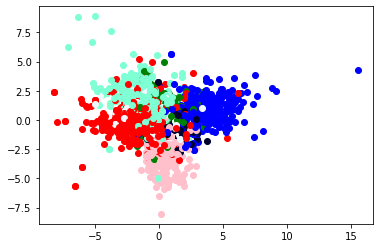

In [31]:
import matplotlib.pyplot as plt                 #加载matplotlib用于数据的可视化
from sklearn.decomposition import PCA           #加载PCA算法包

x, y= [], []
with open("./gcn_colab/gcn/labels.txt", "r") as f:  # 打开文件
    data1 = f.read().strip().split("\n")  # 读取文件
    for i in data1:
        y.append(int(i))
with open("./gcn_colab/gcn/embeddings.txt", "r") as f:  # 打开文件
    data1 = f.read().strip().split("\n")  # 读取文件
    for item in data1:
        a = []
        item1 = item.split(" ")
        for i in item1:
            a.append(float(i))
        x.append(a)

pca=PCA(n_components=2)     #加载PCA算法，设置降维后主成分数目为2
reduced_x=pca.fit_transform(x)#对样本进行降维
print(reduced_x)

# #可视化
color = ['#F0F8FF', 'green', 'b', 'r', '#7FFFD4', '#FFC0CB', '#00022e']
for index, item in enumerate(reduced_x):
    plt.scatter(item[0], item[1], c= color[y[index]])
plt.show()
